# 이미지 수신

Finished!


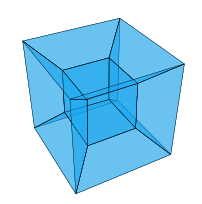

In [1]:
import socket
from PIL import Image
import io

client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
client.setsockopt(socket.SOL_SOCKET, socket.SO_BROADCAST, 1)
client.bind(('', 45000))

n, addr = client.recvfrom(256)
datas = b''

for i in range(int(n.decode())):
    datas += client.recvfrom(65536)[0]

client.close()

print('Finished!')

Image.open(io.BytesIO(datas))

# 동영상 수신+재생 (broadcast)

In [8]:
import socket
import numpy as np
import cv2
import io

client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
client.setsockopt(socket.SOL_SOCKET, socket.SO_BROADCAST, 1)
client.bind(('', 45000))

frames = client.recvfrom(256)[0]
frames = int(float(frames.decode()))

frame = client.recvfrom(256)[0]
frame = round(float(frame.decode()))

n = client.recvfrom(256)[0]
n = int(n.decode())

datas = [b''] * frames
data = ''

for i in range(frames):
    for j in range(n):
        datas[i] += client.recvfrom(65536)[0]
        
print('Finished')

client.close()

for i in range(frames):
    datas[i] = np.frombuffer(datas[i], dtype = 'uint8')

for i in datas:
    data = cv2.imdecode(np.array(i, dtype = 'uint8'), 1)
    cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
    cv2.imshow('Video', data) 
    k = cv2.waitKey(20) & 0xFF

cv2.destroyAllWindows()

Finished


# 재민's 동영상 수신+재생 (TCP)

In [2]:
import socket as sk
import cv2
import numpy as np

def recv_buf(sock, count):
    buf = b''
    while count:
        new_buf = sock.recv(count)
        if not new_buf: return None
        buf += new_buf
        count -= len(new_buf)
    return buf
          
TCP_IP = ''
TCP_PORT = 5001

TCP_client_sk = sk.socket(sk.AF_INET, sk.SOCK_STREAM)
TCP_client_sk.bind((TCP_IP, TCP_PORT))
TCP_client_sk.listen(True)
TCP_recv_sk, addr = TCP_client_sk.accept()

while True:
    try:
        length = recv_buf(TCP_recv_sk, 16)
        str_stream = recv_buf(TCP_recv_sk, int(length))
    except Exception as e:
        print(e)
        break
        
    frame_data = np.frombuffer(str_stream, dtype='uint8')
    TCP_client_sk.close()
    de_frame=cv2.imdecode(frame_data,1)
    cv2.imshow('SERVER',de_frame)
    cv2.waitKey(20)
cv2.destroyAllWindows()

int() argument must be a string, a bytes-like object or a number, not 'NoneType'
